In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

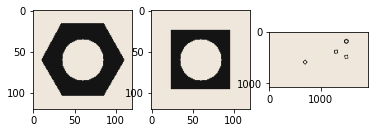

In [3]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

In [4]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

In [5]:
def OtsuThresh(image):
    threshhold, binarized_image =  cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU,)
    return threshhold, binarized_image

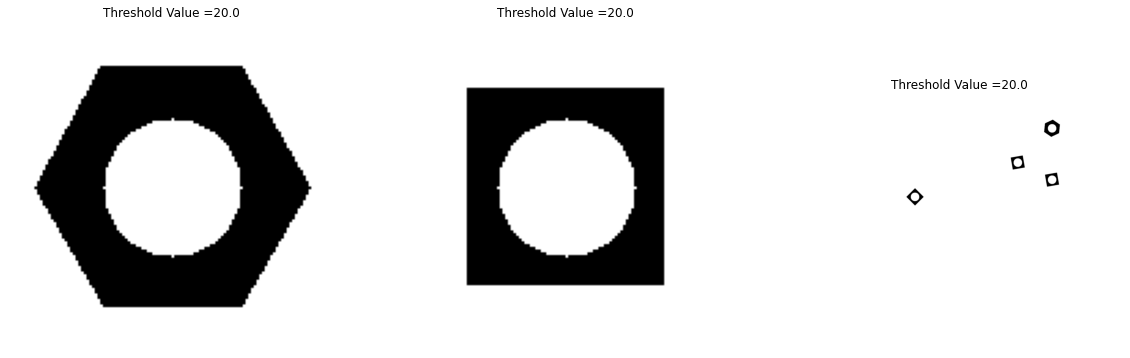

In [6]:
threshold_values = []
otsu_resulted_images = []
input_images = [hexnut_template_gray, squarenut_template_gray, conveyor_f100_gray]
fig, ax = plt. subplots(1,3, figsize = (20,20) )
for i in range(len(input_images)):
    threshold, otsuresult = OtsuThresh(input_images[i])
    threshold_values.append(threshold)
    ax[i].imshow(cv.cvtColor(otsuresult, cv.COLOR_BGR2RGB))
    ax[i].title.set_text("Threshold Value ="+ str(threshold))
    ax[i].axis('off')
    otsu_resulted_images.append(otsuresult)

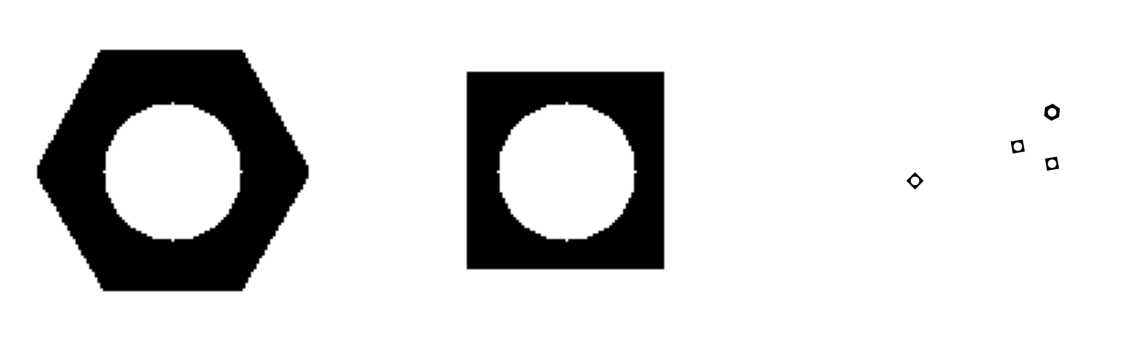

In [7]:
kernel = np.ones((3,3),np.uint8)
morphological_closing_results = []
fig, ax = plt. subplots(1,3, figsize = (20,20) )
for i in range(len(otsu_resulted_images)):
    closing_image = cv.morphologyEx(otsu_resulted_images[i], cv.MORPH_CLOSE, kernel)
    morphological_closing_results.append(closing_image)
    ax[i].imshow(cv.cvtColor(closing_image, cv.COLOR_BGR2RGB))
    ax[i].axis('off')

Number of connected labels of image 0 is 3 

Statistics of image 0 is
 [[  11   16   99   88 4722]
 [   0    0  120  120 7717]
 [  35   35   51   51 1961]] 

Centroids of image 0 is
 [[59.83354511 59.22257518]
 [59.168848   59.54269794]
 [60.         60.        ]] 

Number of connected labels of image 1 is 3 

Statistics of image 1 is
 [[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]] 

Centroids of image 1 is
 [[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]] 

Number of connected labels of image 2 is 6 

Statistics of image 2 is
 [[    651     151     895     499   13930]
 [      0       0    1920    1080 2051826]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]] 

Centroids of image 2 is
 [[1275.02110553  400.11083991]
 [ 956.24734066  540.88404962]
 [1500.          200.        ]
 [1300.         

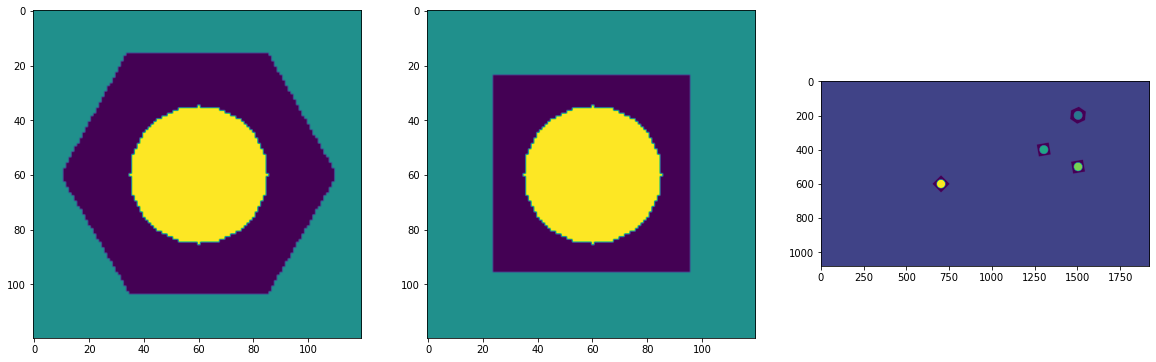

In [8]:
fig, ax = plt. subplots(1,3, figsize = (20,20))
for i in range(len(morphological_closing_results)):
    output = cv.connectedComponentsWithStats(morphological_closing_results[i], 4, cv.CV_32S)
    ax[i].imshow(output[1])
    print("Number of connected labels of image", i, "is", output[0],"\n")
    print("Statistics of image", i, "is\n", output[2], "\n")
    print("Centroids of image", i, "is\n", output[3], "\n")

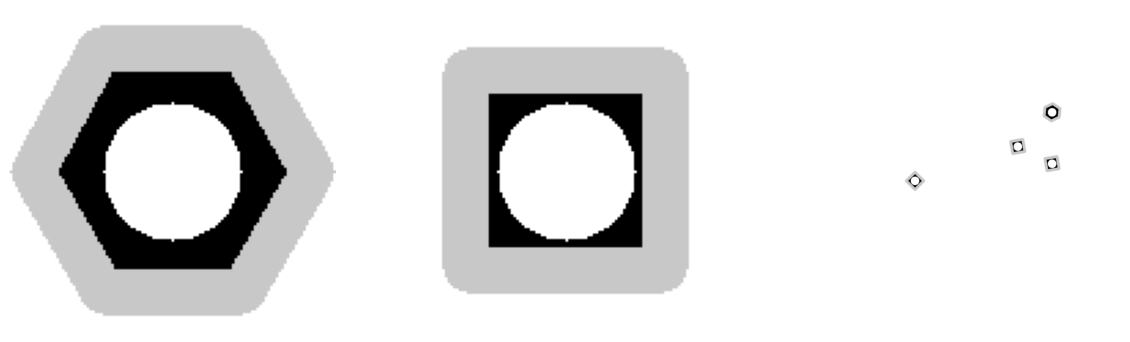

In [9]:
fig, ax = plt. subplots(1,3, figsize = (20,20))
contours_saving = [[],[],[]]
for i in range(len(otsu_resulted_images)):
    contours,hierarchy = cv.findContours(otsu_resulted_images[i],cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
    img_temp = (otsu_resulted_images[i].copy())
    for j in range(len(contours)):
        if 7000>cv.contourArea(contours[j])>4000:
            cv.drawContours(img_temp, contours[j], -1, (200,0,0), 15)
            contours_saving[i].append(contours[j])
    ax[i].imshow(cv.cvtColor(img_temp, cv.COLOR_BGR2RGB))
    ax[i].axis("off")
    


In [10]:
num_of_hexnuts = 0
for i in range(len(contours_saving[2])):
    if cv.matchShapes(contours_saving[0][0], contours_saving[2][i], 1, 0.0) < 0.01:
        num_of_hexnuts += 1
print("number of hexnuts in conveyor_f100 is",num_of_hexnuts)

number of hexnuts in conveyor_f100 is 1


In [11]:
num_of_squarenuts = 0
for i in range(len(contours_saving[2])):
    if cv.matchShapes(contours_saving[1][0], contours_saving[2][i], 1, 0.0) < 0.01:
        num_of_squarenuts += 1
print("number of squarenuts in conveyor_f100 is",num_of_squarenuts)

number of squarenuts in conveyor_f100 is 3


In [35]:
def ObjectCount(frame):
    global total_object_count
    left_centeroids = []
    right_centeroids = []
    frame_contours = []
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    _,binarized = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU) 
    binarized_not = cv.bitwise_not(binarized)
    contours, hierarchy = cv.findContours(binarized_not, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    for i in range(0, len(contours)):
        if 4000<cv.contourArea(contours[i])<7000:
            frame_contours.append(contours[i]) 
    for i in frame_contours:
        M = cv.moments(i)
        cx = int(M['m10']/M['m00'])
        if (500-cx) >= 0:
            left_centeroids.append(cx)
        else:
            right_centeroids.append(cx)
    for i in left_centeroids:
        if 500-i < 10:
            total_object_count+= 1
    line1 = 'Current count of objects:' + str(len(frame_contours))
    line2 = 'Total counts of objects:' + str(total_object_count)
    cv.putText(frame,line1 , (100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,line2 , (100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    return frame

frames = []
s = (1080, 1920, 3)
total_object_count = 0
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
caption = cv.VideoCapture('conveyor.mp4')
frame = []
     
while caption.isOpened():                                    
    ret, frame = caption.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    frames.append(ObjectCount(frame))

    if cv.waitKey(1) == ord('q'):  
        break

caption.release()
cv.destroyAllWindows()

out = cv.VideoWriter('conveyor_result.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (s[1], s[0]))
 
for i in range(len(frames)):
    cv.imshow('Frame', frames[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frames[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
